Bireysel toplam katkı (C): 52.96
Sosyal optimum katkı (C_SO): 100.00
Sosyal optimuma yakınlık farkı (ΔC): 47.04


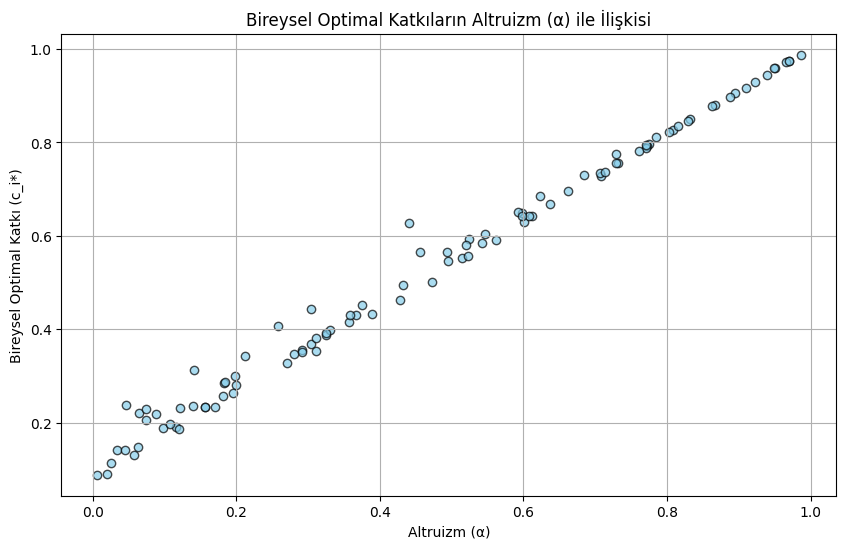

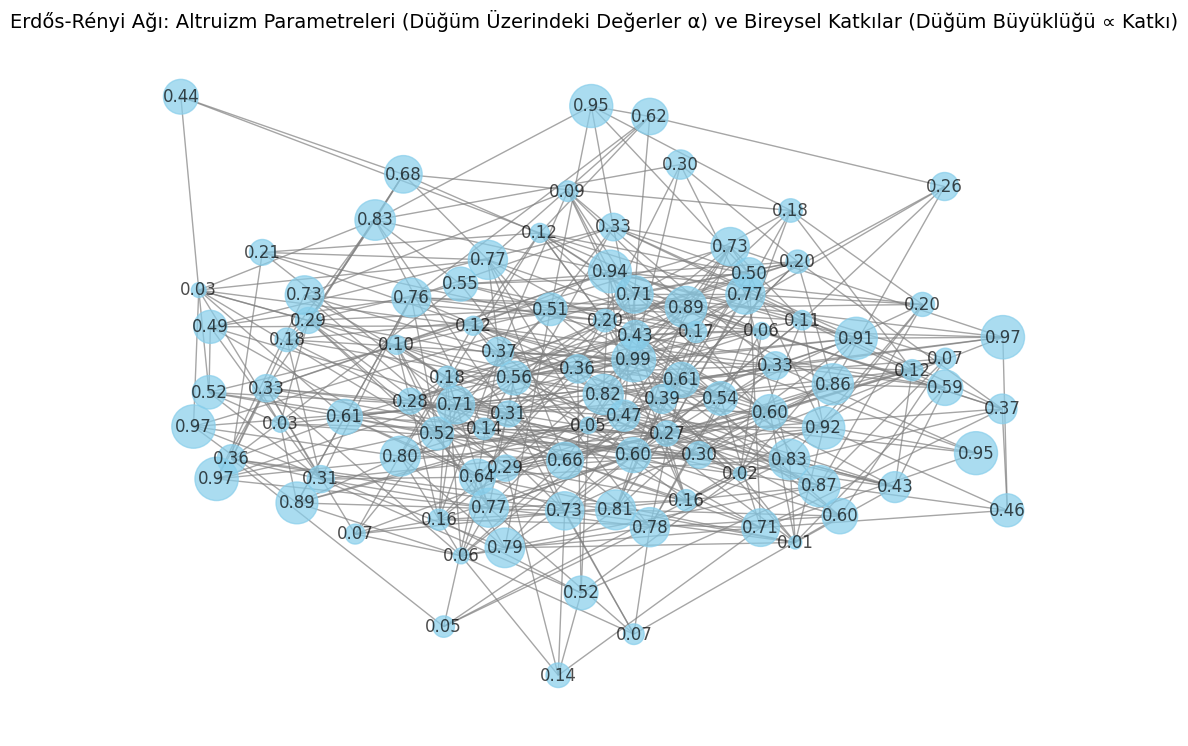

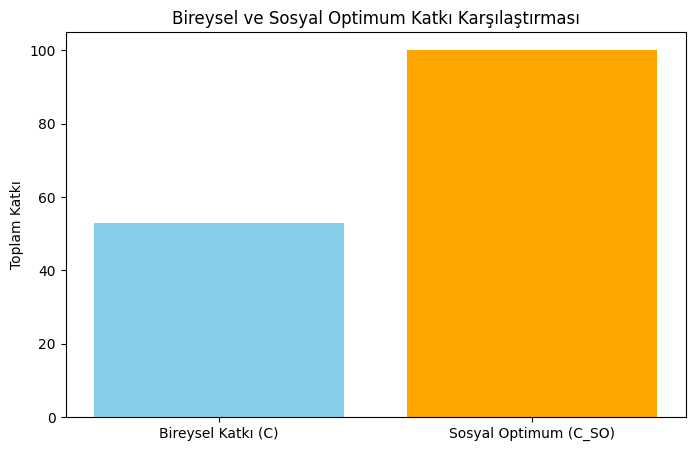

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parametreler
N = 100  # Oyuncu sayısı (düğüm sayısı)
p = 0.1  # Erdős-Rényi ağı için bağlantı olasılığı
beta = 2  # Kamu malı çarpanı
theta = 2  # Maliyet fonksiyonu parametresi

# Erdős-Rényi ağı oluştur
G = nx.erdos_renyi_graph(N, p)

# Heterojen parametreler
np.random.seed(42)  # Rastgelelik için sabit
alpha = np.random.uniform(0, 1, size=N)  # Altruizm parametresi (0-1 arası rastgele)
e = np.random.uniform(100, 200, size=N)  # Başlangıç gelirleri (örnek aralık)

# Komşu sayıları ve bireysel optimal katkılar
c_optimal = np.zeros(N)
for i in range(N):
    N_i = len(list(G.neighbors(i)))  # Oyuncunun komşu sayısı
    if N_i > 0:  # Komşusu yoksa katkı 0
        c_optimal[i] = (beta * (1 + alpha[i] * (N_i - 1)) / (theta * N_i)) ** (1 / (theta - 1))
    else:
        c_optimal[i] = 0

# Sosyal optimum katkı
c_social_optimal = (beta / theta) ** (1 / (theta - 1))
C_social_optimal = N * c_social_optimal  # Toplam sosyal optimum katkı

# Toplam bireysel katkı
C_individual = np.sum(c_optimal)

# Katkı farkı
C_diffr = C_social_optimal - C_individual


# Sonuçları yazdır
print(f"Bireysel toplam katkı (C): {C_individual:.2f}")
print(f"Sosyal optimum katkı (C_SO): {C_social_optimal:.2f}")
print(f"Sosyal optimuma yakınlık farkı (ΔC): {C_social_optimal - C_individual:.2f}")

# 1. Toplam katkının altruizmle ilişkisi
plt.figure(figsize=(10, 6))
plt.scatter(alpha, c_optimal, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Bireysel Optimal Katkıların Altruizm (\u03B1) ile İlişkisi")
plt.xlabel("Altruizm (\u03B1)")
plt.ylabel("Bireysel Optimal Katkı (c_i*)")
plt.grid()
plt.show()


# 2. Ağın görselleştirilmesi
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # Ağ yerleşimi
node_sizes = c_optimal * 1000  # Düğüm büyüklüğü katkı ile orantılı
labels = {i: f"{alpha[i]:.2f}" for i in G.nodes()}  # Altruizm değerlerini etiket olarak atama
nx.draw(G, pos, with_labels=True, labels=labels, node_size=node_sizes, node_color='skyblue', alpha=0.7, edge_color='gray')
plt.title("Erdős-Rényi Ağı: Altruizm Parametreleri (Düğüm Üzerindeki Değerler \u03B1) ve Bireysel Katkılar (Düğüm Büyüklüğü ∝ Katkı)", fontsize=14)
plt.show()

# 3. Toplam katkının karşılaştırılması
plt.figure(figsize=(8, 5))
plt.bar(["Bireysel Katkı (C)", "Sosyal Optimum (C_SO)"], [C_individual, C_social_optimal], color=['skyblue', 'orange'])
plt.title("Bireysel ve Sosyal Optimum Katkı Karşılaştırması")
plt.ylabel("Toplam Katkı")
plt.show()
